In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Generate Samples

In [2]:
np.random.seed(0)
n_pts = 100

top_region = np.array([np.random.normal(loc=10, scale=2, size=n_pts),np.random.normal(loc=12, scale=2, size=n_pts)]).T
bot_region = np.array([np.random.normal(loc=5,scale=2,size=n_pts),np.random.normal(loc=6, scale=2, size=n_pts)]).T

top_region.shape


(100, 2)

## Plot Samples

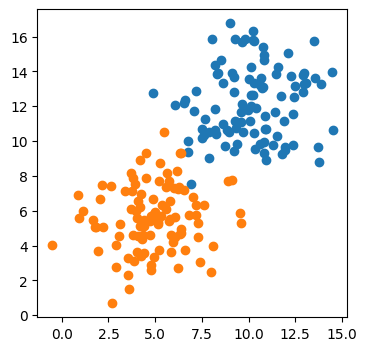

In [10]:
_,ax=plt.subplots(figsize=(4,4))
ax.scatter(top_region[:,0], top_region[:,1])
ax.scatter(bot_region[:,0], bot_region[:,1])
plt.show()


## Sigmoid(z) = 1/1+e^-z


In [11]:

def sigmoid(score):
    return (1/(1+np.exp(-score)))

In [12]:
def draw_line(x1, x2, ax, final):
    if not final:
        ax.plot(x1, x2, color='blue', alpha=0.1)
    else:
        ax.plot(x1, x2, color='red', alpha=0.1)

### Entropy Loss and Gradient Descent

In [13]:
def calculate_error(points, line_params, y):
    z = sigmoid(points * line_params)
    # print(len(y));
    epsilon = 1e-10
    return -1/len(y) * (np.log(z + epsilon).T* y + np.log(1-z + epsilon).T * (1-y))
    

In [14]:
def gradient_descent(points, line_params, y):
    lr = .06
    descent = lr/(len(y)) * (points.T * (sigmoid(points * line_params) - y))
    return descent

    

In [17]:
def update_weights(points, line_params, y, ax):
    
    epochs = 20000
    params = line_params
    for i in range(epochs):
        params = params -  gradient_descent(points, params, y) # Update Weight
        # print(params)
        w1 = params.item(0)
        w2 = params.item(1)
        b  = params.item(2)        
        x1 = np.array([points[:,0].min(), points[:,0].max()])
        x2 = -b/w2 + (x1*(-w1/w2))
        print(calculate_error(points, params, y))
        draw_line(x1, x2, ax, not (i < epochs - 1))
    

[[0.26774497]]
[[0.26750475]]
[[0.2672779]]
[[0.26705239]]
[[0.26682752]]
[[0.26660325]]
[[0.26637955]]
[[0.26615642]]
[[0.26593387]]
[[0.26571186]]
[[0.26549042]]
[[0.26526951]]
[[0.26504915]]
[[0.26482932]]
[[0.26461002]]
[[0.26439124]]
[[0.26417298]]
[[0.26395523]]
[[0.26373799]]
[[0.26352126]]
[[0.26330503]]
[[0.26308929]]
[[0.26287405]]
[[0.26265929]]
[[0.26244503]]
[[0.26223124]]
[[0.26201793]]
[[0.2618051]]
[[0.26159274]]
[[0.26138086]]
[[0.26116944]]
[[0.26095848]]
[[0.26074799]]
[[0.26053795]]
[[0.26032837]]
[[0.26011925]]
[[0.25991058]]
[[0.25970235]]
[[0.25949458]]
[[0.25928725]]
[[0.25908037]]
[[0.25887392]]
[[0.25866792]]
[[0.25846235]]
[[0.25825722]]
[[0.25805252]]
[[0.25784826]]
[[0.25764442]]
[[0.25744101]]
[[0.25723803]]
[[0.25703547]]
[[0.25683334]]
[[0.25663163]]
[[0.25643034]]
[[0.25622946]]
[[0.25602901]]
[[0.25582897]]
[[0.25562934]]
[[0.25543012]]
[[0.25523132]]
[[0.25503292]]
[[0.25483494]]
[[0.25463736]]
[[0.25444018]]
[[0.25424341]]
[[0.25404704]]
[[0.25385107

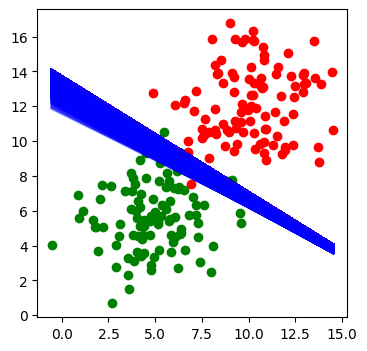

In [18]:
w1,w2,b = -0.2, -0.35, 3.5

all_points = np.vstack((top_region, bot_region))  # 0s first, 1s after

bias = np.ones((len(all_points),1))

line_params = np.matrix([w1, w2, b]).T
x1 = np.array([bot_region[:,0].min(),top_region[:,0].max()])
x2 = -b/w2 + (x1*(-w1/w2))
all_points_with_bias = np.hstack((all_points,bias))
y = np.array([np.zeros(n_pts), np.ones(n_pts)]).reshape(n_pts*2, 1)

# print(calculate_error(all_points_with_bias, line_params, y))
gradient_descent(all_points_with_bias, line_params, y )

# print(sigmoid(all_points_with_bias * line_params))
_, ax= plt.subplots(figsize=(4,4))
# draw_line(x1, x2, ax, False)
ax.scatter(top_region[:,0], top_region[:, 1], color='r')
ax.scatter(bot_region[:,0], bot_region[:, 1], color='g')
update_weights(all_points_with_bias, line_params, y, ax )

plt.show()




